In [ ]:
"""
Purpose: To test to see if theory on how can distinguish incorrect splits 
from correct splits using webbing, widht and branch angle

Ideas: if looked at the splits from a cytoskeelton viewpoint
1) if split off into equal width portions at high sibling
angle then will see webbing
2) If not have high sibling angle then might not need 

BUT USUALLY DON'T SEE LOW SIBLING ANGLES WITH THE SMALL AXON
WHICH IS WHY SEE WEBBING THERE

Things would be able to need:
1) Visualize the error and non-error branches of a cell
- border branches and downstream errors

2) Function that goes through and applies a new rule to a cell
a) Highlights the branches that will be cut according to new rule
b) Measure precision/recall on branch cuts
c) Measure overall cell proofreading precision/recall (branch wise or synaptically)

3) Might need to develop a new function that moves along graph and can look at:
- skeleton/parent angle

Plan of Attack:
1) 

"""

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty")

import datajoint_utils as du
from importlib import reload

INFO - 2021-04-13 18:00:23,252 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-13 18:00:23,254 - settings - Setting database.user to celiib
INFO - 2021-04-13 18:00:23,255 - settings - Setting database.password to newceliipass
INFO - 2021-04-13 18:00:23,312 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-04-13 18:00:23,314 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-13 18:00:23,332 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-04-13 18:00:23,755 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-13 18:00:23,795 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-13 18:00:23,797 - settings - Setting database.user to celiib
INFO - 2021-04-13 18:00:23,798 - settings - Setting database.password to newceliipass
INFO - 2021-04-13 18:00:23,799 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-13 18:00:23,800 - settings - Setting database.user to celiib
INFO - 2021-04-13 18:00:23,800 - settings - Setting database.password to newceliipass
INFO - 2021-04-13 18:00:23,803 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-13 18:00:24,248 - settings - Setting enable_python_native_blobs to True


In [3]:
#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2021-04-13 18:00:24,383 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-13 18:00:24,385 - settings - Setting database.user to celiib
INFO - 2021-04-13 18:00:24,386 - settings - Setting database.password to newceliipass
INFO - 2021-04-13 18:00:24,390 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-13 18:00:24,885 - settings - Setting enable_python_native_blobs to True


In [10]:
import neuron_utils as nru
import neuron_visualizations as nviz

# Fetching the Neuron

In [4]:
minnie.AutoProofreadValidationBorder()

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),split_index the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM,proof_version the version of code used for this cell typing classification,axon_version,parent_idx,web_size_faces,web_size_volume,web_size_skeleton,web_size_ray_trace_percentile,web_bbox_ratios_max,web_bbox_ratios_min,web_volume_ratio,web_cdf,parent_n_large_boutons,parent_n_boutons,parent_no_bouton_median,parent_no_spine_median_mesh_center,child_no_bouton_median_min,child_no_bouton_median_diff_min,child_no_spine_median_mesh_center_min,child_no_spine_median_mesh_center_diff_min,child_angle_min,child_n_boutons_min,child_n_large_boutons_min,child_no_bouton_median_max,child_no_bouton_median_diff_max,child_no_spine_median_mesh_center_max,child_no_spine_median_mesh_center_diff_max,child_angle_max,child_n_boutons_max,child_n_large_boutons_max,sibling_angles_min,sibling_angles_max,label
864691135113167769,0,0.25,30.00,5,0,0,3,0,25,124,124043806.52500916,1543.817733468448,329.3614638698137,1.9818033758876452,1.1456226962516913,2.388934917594883,0.742895,3,15,106.27459096347302,110.75343601224178,59.20002831337389,-47.074562650099125,59.20002831337389,-51.553407698867886,18.34,0,0,59.20002831337389,-47.074562650099125,59.20002831337389,-51.553407698867886,114.46,10,0,101.18,101.18,valid
864691135113167769,0,0.25,30.00,5,0,0,3,0,33,362,1158687079.9782996,3674.7854580103326,372.5871005673645,3.509178213022797,1.3529679330298574,1.963608699589879,0.5540505,0,0,182.76536725111384,182.76536725111384,92.4871982140348,-90.27816903707904,104.68539546757829,-78.07997178353556,10.95,1,0,92.4871982140348,-90.27816903707904,104.68539546757829,-78.07997178353556,38.11,15,3,48.74,48.74,valid
864691135113167769,0,0.25,30.00,5,0,0,3,0,35,51,26370949.94332186,1019.6161407995952,176.78855354532072,2.2322996232226795,1.2516471421494915,1.901370012853932,0.303688,2,17,102.08743604032234,112.09276481057641,100.48239021999521,-1.6050458203271347,102.12305340650975,-9.969711404066658,23.74,0,0,100.48239021999521,-1.6050458203271347,102.12305340650975,-9.969711404066658,126.54,1,1,149.17,149.17,invalid
864691135113167769,0,0.25,30.00,5,0,0,3,0,58,123,170487768.338267,2240.5780127218754,198.84433280695026,1.7905620799410142,1.0344524389415621,2.3329946927315195,0.660586,0,3,84.28187368323856,91.48739940492703,49.558819053315645,-34.72305462992291,53.31209769981907,-38.17530170510796,25.87,4,0,49.558819053315645,-34.72305462992291,53.31209769981907,-38.17530170510796,43.92,16,2,63.48,63.48,valid
864691135113167769,0,0.25,30.00,5,0,0,3,0,64,40,47594919.924835205,937.009081606932,251.63548827125797,1.1646130862813708,1.044847594099291,2.271011784744647,0.5999935000000001,0,1,108.18690772465524,112.71485462886615,107.87814494638877,-0.3087627782664697,116.33563389870751,3.620779269841364,38.63,2,0,107.87814494638877,-0.3087627782664697,116.33563389870751,3.620779269841364,55.95,3,0,92.78,92.78,valid
864691135113167769,0,0.25,30.00,5,0,0,3,0,65,104,218020349.15270233,2098.1580232694077,313.20655984441794,1.1392826708250756,1.047736009406659,1.9597572689690155,0.6987399999999999,0,2,107.87814494638877,116.33563389870751,52.318986773229035,-55.55915817315974,54.367293722829736,-61.96834017587778,4.34,1,0,52.318986773229035,-55.55915817315974,54.367293722829736,-61.96834017587778,29.16,6,0,32.55,32.55,valid
864691135113167769,0,0.25,30.00,5,0,0,3,0,66,200,398468976.0860605,2053.0175329991107,389.6132826512314,1.5289558965742194,1.2059730074994737,2.745894503130506,0.7163029999999999,0,0,101.32018886008184,101.32018886008184,120.84307575495245,19.52288689487061,120.84307575495245,19.52288689487061,4

In [5]:
minnie.AutoProofreadValidationBorderNeurons()

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),split_index the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM,proof_version the version of code used for this cell typing classification,decomposition
864691135925564174,0,0.25,30.00,5,0,0,3,=BLOB=
864691136008425132,0,0.25,30.00,5,0,0,3,=BLOB=
864691135393964789,0,0.25,30.00,5,0,0,3,=BLOB=
864691136333790899,0,0.25,30.00,5,0,0,3,=BLOB=
864691135974454895,0,0.25,30.00,5,0,0,3,=BLOB=
864691136099807093,0,0.25,30.00,5,0,0,3,=BLOB=
864691136333776819,0,0.25,30.00,5,0,0,3,=BLOB=
864691136311740477,0,0.25,30.00,5,0,0,3,=BLOB=
864691136008573614,0,0.25,30.00,5,0,0,3,=BLOB=
864691135974454383,0,0.25,30.00,5,0,0,3,=BLOB=


In [17]:
segment_id = 864691136008573614
segment_id = 864691135212632448
minnie.AutoProofreadValidationBorder() & dict(segment_id=segment_id)

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),split_index the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM,proof_version the version of code used for this cell typing classification,axon_version,parent_idx,web_size_faces,web_size_volume,web_size_skeleton,web_size_ray_trace_percentile,web_bbox_ratios_max,web_bbox_ratios_min,web_volume_ratio,web_cdf,parent_n_large_boutons,parent_n_boutons,parent_no_bouton_median,parent_no_spine_median_mesh_center,child_no_bouton_median_min,child_no_bouton_median_diff_min,child_no_spine_median_mesh_center_min,child_no_spine_median_mesh_center_diff_min,child_angle_min,child_n_boutons_min,child_n_large_boutons_min,child_no_bouton_median_max,child_no_bouton_median_diff_max,child_no_spine_median_mesh_center_max,child_no_spine_median_mesh_center_diff_max,child_angle_max,child_n_boutons_max,child_n_large_boutons_max,sibling_angles_min,sibling_angles_max,label
864691135212632448,0,0.25,30.00,5,0,0,3,0,28,133,390535919.83182776,1565.9395585198358,651.1394877031369,1.193511706248254,1.0435312459619979,1.9164638613523934,0.742695,0,0,254.7941811047929,254.7941811047929,102.08411387815694,-152.71006722663594,102.08411387815694,-152.71006722663594,32.99,0,0,102.08411387815694,-152.71006722663594,102.08411387815694,-152.71006722663594,63.57,0,0,78.4,78.4,valid
864691135212632448,0,0.25,30.00,5,0,0,3,0,30,193,577043050.5725784,4237.103459205819,117.26081408142988,1.8196341763068717,1.0001060659622458,2.815815302017368,0.11546,0,0,72.34132489447025,72.34132489447025,199.3733577256494,127.03203283117917,199.3733577256494,127.03203283117917,42.36,0,0,199.3733577256494,127.03203283117917,199.3733577256494,127.03203283117917,164.48,2,1,88.18,144.46,valid
864691135212632448,0,0.25,30.00,5,0,0,3,0,33,47,50816922.12428792,1394.4838097757017,162.0120269374509,2.001593026164973,1.1280692821127332,2.35418820928229,0.744082,0,3,55.487321773305815,56.38619819851696,62.33416821102783,6.846846437722014,62.33416821102783,5.947970012510872,13.91,0,0,62.33416821102783,6.846846437722014,62.33416821102783,5.947970012510872,109.39,0,0,122.87,122.87,valid
864691135212632448,0,0.25,30.00,5,0,0,3,0,35,93,143702916.1653439,1725.6236448111838,211.4361746516355,2.334004723393049,1.1426624425432275,2.470780865280611,0.317905,0,2,43.59058779443179,60.74929878398849,71.0792718236183,27.48868402918651,42.91526733380065,-17.834031450187844,32.24,0,0,71.0792718236183,27.48868402918651,42.91526733380065,-17.834031450187844,132.35,5,2,30.14,148.73,valid
864691135212632448,0,0.25,30.00,5,0,0,3,0,36,228,723767405.6366997,4307.288726601057,93.54971007278758,1.5080748633374337,1.051275208285667,3.1518211364347604,0.09288165,1,7,102.86489766253152,108.27691904934231,55.777529882184,-47.08736778034752,62.47924403071497,-45.79767501862734,29.36,1,0,55.777529882184,-47.08736778034752,62.47924403071497,-45.79767501862734,81.96,2,1,92.79,146.24,invalid
864691135212632448,0,0.25,30.00,5,0,0,3,0,38,89,112322042.73697837,1523.656200330534,249.76281392429422,1.1570277375802465,1.0222445648404326,2.6825455361787274,0.798753,0,2,55.777529882184,62.47924403071497,61.84313770780982,6.065607825625818,65.88805220796088,3.408808177245909,5.69,0,0,61.84313770780982,6.065607825625818,65.88805220796088,3.408808177245909,82.56,4,1,85.45,85.45,invalid
864691135212632448,0,0.25,30.00,5,0,0,3,0,40,137,380879232.0943247,3272.6563470490432,90.82152302126617,1.5974409108120948,1.0329516699343049,2.4815884369072774,0.368873,0,1,53.034234907155636,53.43905170597175,43.59058779443179,-9.443647112723845,60.74929878398849,7.310247078016744,22.32,2,0,43.59058779443179,-9.443647112723845,60.74929878398849,7.31024707

In [135]:
neuron_obj = du.fetch_neuron_obj_manual(segment_id=segment_id,
                                       border_validation=True)

Decompressing Neuron in minimal output mode...please wait


In [136]:
nviz.plot_axon(neuron_obj)


 Working on visualization type: mesh

 Working on visualization type: skeleton


# Way to Visualize the correct and incorrect branches

In [137]:
import validation_utils as vu
border_branches = vu.proofread_border_branches(neuron_obj,border_type="valid_to_invalid",
                            plot_border_branches=True)

Synapsse Results:
Total Number of Synapses = 3772
n_valid_syn_ids_presyn = 40
n_errored_syn_ids_presyn = 373
n_valid_syn_ids_postsyn = 3319
n_errored_syn_ids_postsyn = 40
10 boundary_branches : [ 35  36  38  62  63  64  67  94 111 113]

 Working on visualization type: mesh

 Working on visualization type: skeleton


# Will be able to zoom in on any of the border points to analyze

In [138]:
"""

Inputs: 
1) the border branch index you want to see
2) If want to print out the information about 

Psuedocode: 
1) find all the downstream branches
2) Find the shared skeleton endpoint for the downstream and border branch
--> turn the y value negative for zooming later

If want to print information:


"""

'\n\nInputs: \n1) the border branch index you want to see\n2) If want to print out the information about \n\nPsuedocode: \n1) find all the downstream branches\n2) Find the shared skeleton endpoint for the downstream and border branch\n--> turn the y value negative for zooming later\n\nIf want to print information:\n\n\n'

In [140]:
import axon_utils as au
neuron_obj = au.complete_axon_processing(neuron_obj,
                                        verbose=True)


Part 1: Axon like branchese 
{'L0': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17,
       18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 51]), 'L1': array([5]), 'L2': array([11]), 'L4': array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
 

base_final_widths = [232.15526048 261.97593907 273.4573949 ]
overall_ais_width = 222.31414572958042
ais_width = 255.8628648190211
Adding the following branches as true axons: [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142.]
curr_soma_angle = 166.35
max_axon_angle = 171.56205865088413
Changing to a better axon candidate



  0%|          | 0/1 [00:00<?, ?it/s]

root_curr = [742948.9 748461.6 851662. ]
Time for preparing soma vertices and root: 0.000392913818359375
invalidation_d = 2000
cc_vertex_thresh = 10


100%|██████████| 1/1 [00:02<00:00,  2.30s/it]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 3.1548047065734863
branches_touching_root = [8]
combining close nodes
combine_threshold = 1300
length of Graph = 20288
After combining close endpoints max(kept_branches_idx) = 171, len(kept_branches_idx) = 156
empty_indices % = 0.0
 conflict_indices % = 0.02214013862822363
AFTER face_lookup_resolved_test
Decomposing first pass: 13.700690984725952
Only Using MeshParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.600120544433594e-05
Total time for MAP sublimb processing 3.5762786865234375e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 5.245208740234375e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.003347158432006836
sbv[0].reshape(-1,3) = [[742948.9 748461.6 851662. ]]
closest_sk_pt_coord BEFORE = [743251.56236007 748961.8

# Visualizing all of the errors

In [ ]:
vu.valid_invalid_axon_branches_from_labeled_synapses(
    neuron_obj = neuron_obj,
    validation_df = curr_validation_df,
    verbose = False,
    plot_valid_limb_branch_dict = False,
    plot_invalid_limb_branch_dict = True,
)

In [172]:
nviz.plot_limb_branch_dict_multiple?

In [169]:
lb1 = {neuron_obj.axon_limb_name:[10,15,17,18]}
lb2 = {neuron_obj.axon_limb_name:[1,2,3,4,5,6,]}

nviz.plot_limb_branch_dict_multiple(neuron_obj,
                               limb_branch_dict_list=[lb1,lb2],
                               color_list=["red","blue"])


 Working on visualization type: mesh


In [ ]:
nviz.visualize_neuron(sca)

In [175]:
valid_border_branches = vu.proofread_border_branches(neuron_obj=neuron_obj,
    validation_df = None,
    plot_valid_limb_branch_dict = True,
    plot_invalid_limb_branch_dict = True,
    plot_invalid_conn_comp = False,
    plot_invalid_conn_comp_idx = None,
    plot_invalid_conn_comp_path = False,

    border_type = "valid_to_valid",#other type is valid_to_invalid)
    verbose = False,
    plot_border_branches= False,
                               )


Synapsse Results:
Total Number of Synapses = 3772
n_valid_syn_ids_presyn = 40
n_errored_syn_ids_presyn = 373
n_valid_syn_ids_postsyn = 3319
n_errored_syn_ids_postsyn = 40

 Working on visualization type: mesh


# Zoom in on the errors

In [158]:
valid_border_branches

array([ 28,  30,  33,  35,  40,  54,  55,  57,  63,  65,  75,  76,  80,
        81,  82,  83,  85,  93,  96,  99, 100, 101, 104, 117])

In [231]:
axon_limb_name = neuron_obj.axon_limb_name
curr_idx = 1
curr_border_idx = border_brnaches[curr_idx]
nviz.visualize_branch_at_downstream_split(neuron_obj=neuron_obj,
                                         limb_idx=neuron_obj.axon_limb_name,
                                         branch_idx=curr_border_idx,
                                        radius = 20000,
                                        branch_color = "mediumblue",
                                        downstream_color = "red",
                                        print_border_info = True,
                                        verbose = True)


# of downstream targets = 3

 Working on visualization type: mesh

 Working on visualization type: skeleton


web_size_faces:47
web_size_volume:41142849.049346924
web_size_skeleton:1084.3319301647755
web_size_ray_trace_percentile:118.01426740236904
web_bbox_ratios_max:1.7793613772918584
web_bbox_ratios_min:1.2966038378366211
web_volume_ratio:2.8529403214719538
web_cdf:0.161562
parent_n_large_boutons:1
parent_n_boutons:4
parent_no_bouton_median:104.9851191870863
parent_no_spine_median_mesh_center:108.27691904934231
child_no_bouton_median_min:48.12490369892055
child_no_bouton_median_diff_min:-56.86021548816575
child_no_spine_median_mesh_center_min:60.42573690144127
child_no_spine_median_mesh_center_diff_min:-47.85118214790104
child_angle_min:29.36
child_n_boutons_min:2
child_n_large_boutons_min:0
child_no_bouton_median_max:48.12490369892055
child_no_bouton_median_diff_max:-56.86021548816575
child_no_spine_median_mesh_center_max:60.42573690144127
child_no_spine_median_mesh_center_diff_max:-47.85118214790104
child_angle_max:81.96
child_n_boutons_max:3
child_n_large_boutons_max:1
sibling_angles_min

# Try other neurons

In [361]:
minnie.AutoProofreadValidationBorderNeurons()

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),split_index the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM,proof_version the version of code used for this cell typing classification,decomposition
864691135407289801,0,0.25,30.00,5,0,0,3,=BLOB=
864691135945413668,0,0.25,30.00,5,0,0,3,=BLOB=
864691135645592260,0,0.25,30.00,5,0,0,3,=BLOB=
864691135974454639,0,0.25,30.00,5,0,0,3,=BLOB=
864691136311740477,0,0.25,30.00,5,0,0,3,=BLOB=


In [176]:
segment_ids = du.proofreading_stats_table(validation=True).fetch("segment_id")

validation_dfs = [vu.synapse_validation_df_single_neuron(k,
                                        remove_presyn_on_dendrite = False,
                        count_presyn_on_dendrite_as_correct = True,
                                                        include_extension_synapse=False) for k in segment_ids]

Synapsse Results:
Total Number of Synapses = 3990
n_valid_syn_ids_presyn = 5
n_errored_syn_ids_presyn = 29
n_valid_syn_ids_postsyn = 3891
n_errored_syn_ids_postsyn = 65
Synapsse Results:
Total Number of Synapses = 4434
n_valid_syn_ids_presyn = 39
n_errored_syn_ids_presyn = 482
n_valid_syn_ids_postsyn = 3898
n_errored_syn_ids_postsyn = 15
Synapsse Results:
Total Number of Synapses = 923
n_valid_syn_ids_presyn = 13
n_errored_syn_ids_presyn = 153
n_valid_syn_ids_postsyn = 753
n_errored_syn_ids_postsyn = 4
Synapsse Results:
Total Number of Synapses = 4361
n_valid_syn_ids_presyn = 86
n_errored_syn_ids_presyn = 621
n_valid_syn_ids_postsyn = 3649
n_errored_syn_ids_postsyn = 5
Synapsse Results:
Total Number of Synapses = 3452
n_valid_syn_ids_presyn = 76
n_errored_syn_ids_presyn = 345
n_valid_syn_ids_postsyn = 3007
n_errored_syn_ids_postsyn = 24
Synapsse Results:
Total Number of Synapses = 3190
n_valid_syn_ids_presyn = 18
n_errored_syn_ids_presyn = 89
n_valid_syn_ids_postsyn = 3081
n_errored_sy

Synapsse Results:
Total Number of Synapses = 1645
n_valid_syn_ids_presyn = 0
n_errored_syn_ids_presyn = 108
n_valid_syn_ids_postsyn = 1536
n_errored_syn_ids_postsyn = 1
Synapsse Results:
Total Number of Synapses = 4633
n_valid_syn_ids_presyn = 72
n_errored_syn_ids_presyn = 219
n_valid_syn_ids_postsyn = 4328
n_errored_syn_ids_postsyn = 14
Synapsse Results:
Total Number of Synapses = 2383
n_valid_syn_ids_presyn = 0
n_errored_syn_ids_presyn = 47
n_valid_syn_ids_postsyn = 2334
n_errored_syn_ids_postsyn = 2
Synapsse Results:
Total Number of Synapses = 4015
n_valid_syn_ids_presyn = 12
n_errored_syn_ids_presyn = 109
n_valid_syn_ids_postsyn = 3879
n_errored_syn_ids_postsyn = 15
Synapsse Results:
Total Number of Synapses = 1914
n_valid_syn_ids_presyn = 3
n_errored_syn_ids_presyn = 212
n_valid_syn_ids_postsyn = 1528
n_errored_syn_ids_postsyn = 171
Synapsse Results:
Total Number of Synapses = 10012
n_valid_syn_ids_presyn = 8
n_errored_syn_ids_presyn = 164
n_valid_syn_ids_postsyn = 9825
n_errored_

In [195]:
valid_presyn_counts = np.array([synapse_validation_df_to_category_counts(k)["presyn"]["TP"] for k in validation_dfs])
seg_ids = np.array([vu.validation_df_to_old_segment_id(k) for k in validation_dfs])
presyn_TP_argsort = np.flip(np.argsort(valid_presyn_counts))
print(valid_presyn_counts[presyn_TP_argsort])
print(seg_ids[presyn_TP_argsort])

[203 115 105  91  84  67  64  59  59  56  50  46  41  40  38  34  33  31
  30  29  28  23  20  19  17  13  11  11  11  10   9   9   8   8   7   7
   5   5   4   4   2   2   1   1   0   0   0   0   0   0   0   0   0   0
   0]
[864691135866394390 864691136311791677 864691136175008774
 864691136194103510 864691136105498585 864691136194042326
 864691135974454895 864691135974454383 864691135735426708
 864691135771629819 864691136333790899 864691135348272855
 864691135382947307 864691136134446219 864691135589907979
 864691135785277636 864691136537477538 864691135272164113
 864691135645592260 864691135740225387 864691136105493209
 864691136618412685 864691136550489250 864691136545546146
 864691136618403213 864691135491233631 864691135564655959
 864691135212632448 864691136003930314 864691136105484249
 864691135233108569 864691135113167769 864691136008573614
 864691135925564174 864691136333776819 864691135699269154
 864691136201041854 864691136370815112 864691136008425132
 864691135736387732 8

Segment_id = 864691135645592260
Presyn counts:
TP:30
TN:118
FP:6
FN:5


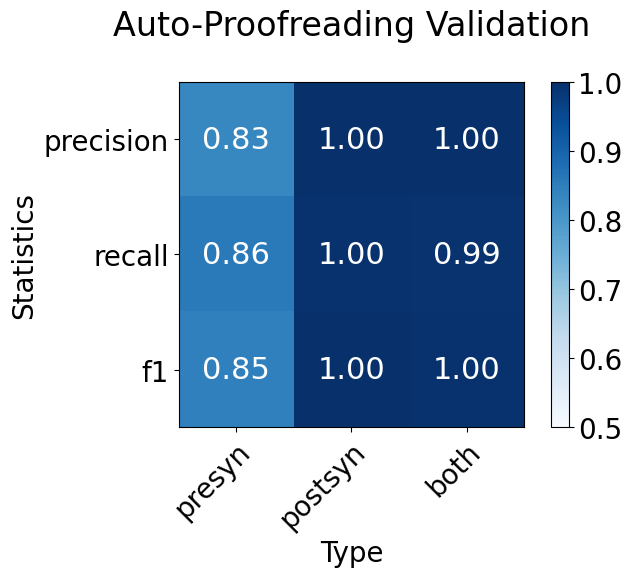

In [363]:
curr_idx = 19
#curr_idx = 20
#segment_id = segment_ids[curr_idx]
segment_id = 864691135645592260
print(f"Segment_id = {segment_id}")
curr_validation_df = validation_dfs[np.where(seg_ids==segment_id)[0][0]]
vu.synapse_validation_df_to_score_plot(curr_validation_df)

In [364]:
neuron_obj = du.fetch_neuron_obj_manual(segment_id=segment_id,
                                       border_validation=True)

Decompressing Neuron in minimal output mode...please wait


In [387]:
neuron_obj_high_fid_axon.axon_limb_name

'L2'

In [388]:
#for k in neuron_obj[2]:
for k in neuron_obj_high_fid_axon[2]:
    print(k.web)

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


In [367]:
invalid_border_branches = vu.proofread_border_branches(neuron_obj=neuron_obj,
    plot_valid_limb_branch_dict = True,
    plot_invalid_limb_branch_dict = True,
                                                     border_type="valid_to_invalid"
                               )

Synapsse Results:
Total Number of Synapses = 3302
n_valid_syn_ids_presyn = 36
n_errored_syn_ids_presyn = 123
n_valid_syn_ids_postsyn = 3128
n_errored_syn_ids_postsyn = 15

 Working on visualization type: mesh

 Working on visualization type: skeleton


In [444]:
neuron_obj.segment_id

864691135645592260

In [366]:
invalid_border_branches = vu.proofread_border_branches(neuron_obj=neuron_obj,
    plot_valid_limb_branch_dict = True,
    plot_invalid_limb_branch_dict = True,
                                                     border_type="valid_to_invalid"
                               )

Synapsse Results:
Total Number of Synapses = 3302
n_valid_syn_ids_presyn = 36
n_errored_syn_ids_presyn = 123
n_valid_syn_ids_postsyn = 3128
n_errored_syn_ids_postsyn = 15

 Working on visualization type: mesh

 Working on visualization type: skeleton


In [382]:
nviz.plot_boutons(neuron_obj_high_fid_axon,
                  plot_web=True)


 Working on visualization type: mesh

 Working on visualization type: skeleton


In [428]:
nru.find_sibling_child_skeleton_angle(curr_limb,55)

KeyError: None

In [439]:
np.max(limb_branch_dict["parent_angle"].to_numpy())

141.85

In [442]:
import neuron_searching as ns
limb_branch_dict = ns.query_neuron(neuron_obj,
               functions_list=[
                   #"sibling_angle_min",
                   "parent_angle",
                   #"sibling_angle_max"
               ],
               query="parent_angle>130",
                                   #return_dataframe=True,
               limbs_to_process=["L2"])
limb_branch_dict

{'L2': array([ 5, 13, 22, 38, 52])}

In [443]:
nviz.plot_limb_branch_dict(neuron_obj,
                          limb_branch_dict)


 Working on visualization type: mesh


In [379]:
import proofreading_utils as pru
neuron_obj_high_fid_axon = pru.refine_axon_for_high_fidelity_skeleton(neuron_obj,
                                                                     verbose=True)

Starting axon branch was the starting node so using border vertices and NOT computing upstream branch
upstream_node_to_axon_starting_branch = None
root_curr = [1194577.   644352.   979488.9]
Time for preparing soma vertices and root: 0.0007555484771728516
invalidation_d = 1500


  0%|          | 0/1 [00:00<?, ?it/s]

cc_vertex_thresh = 10


100%|██████████| 1/1 [00:03<00:00,  3.60s/it]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 6.17979884147644
connecting at the root
branches_touching_root = [145]
combining close nodes
combine_threshold = 1300
length of Graph = 24707
After combining close endpoints max(kept_branches_idx) = 145, len(kept_branches_idx) = 131
empty_indices % = 0.0
 conflict_indices % = 0.013347463864111396
AFTER face_lookup_resolved_test
Decomposing first pass: 24.38207173347473
Only Using MeshParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 0.00018525123596191406
Total time for MAP sublimb processing 3.337860107421875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 0.0002739429473876953
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.2550983428955078
sbv[0].reshape(-1,3) = [[1194577.   644352.   979488.9]]
closest_sk_pt_coord BEFORE = [



---------Working on soma_idx = 0, soma_group_idx 0, endpt = [1194334.46316384  644583.27489671  979088.92594021]---------
Starting_edge inside branches_to_conept = [[1194334.46316384  644583.27489671  979088.92594021]
 [1194407.54073011  689663.18636693  992760.47105344]]
At the start, starting_node (in terms of the skeleton, that shouldn't match the starting edge) = [51]
printing out current edge:
[[1194334.46316384  644583.27489671  979088.92594021]
 [1194407.54073011  689663.18636693  992760.47105344]]
edge_endpoints_to_process was empty so exiting loop after 107 iterations
starting_node in concept map (that should match the starting edge) = 55
Total time for branches to concept conversion = 2.3537349700927734

Done generating concept network 




In [380]:
nviz.plot_axon(neuron_obj_high_fid_axon)


 Working on visualization type: mesh

 Working on visualization type: skeleton


In [375]:
val, inv = vu.validation_df_to_valid_invalid_coordinates(validation_df=curr_validation_df)
nviz.plot_objects(scatters=[val,inv],scatters_colors=["aqua","red"],append_figure=True,
                  scatter_size=0.05,
                  show_at_end=False,
                  set_zoom=False,
                 #zoom_coordinate=shared_skeleton_pt,
                 #zoom_radius=3000
                 )

In [368]:
import networkx_utils as xu
d_nodes = xu.downstream_nodes(limb_obj.concept_network_directional,curr_border_idx)
d_nodes
limb_obj = neuron_obj[neuron_obj.axon_limb_name]
print(f"{curr_border_idx}:{limb_obj[curr_border_idx].width_new}")
print(f"Children")
for d in d_nodes:
    print(f"{d}:{limb_obj[d].width_new}")

12:{'median_mesh_center': 51.95195953676231, 'no_spine_median_mesh_center': 51.95195953676231, 'no_bouton_median': 51.95195953676231}
Children
4:{'median_mesh_center': 52.75185011934532, 'no_spine_median_mesh_center': 52.75185011934532, 'no_bouton_median': 52.75185011934532}
8:{'median_mesh_center': 86.2738618039432, 'no_spine_median_mesh_center': 86.2738618039432, 'no_bouton_median': 86.2738618039432}


In [369]:
curr_idx = 0
curr_border_idx = invalid_border_branches[curr_idx]
print(f"Border branch: {curr_border_idx}")
nviz.set_zoom_to_limb_branch(neuron_obj,
                            limb_idx=neuron_obj.axon_limb_name,
                            branch_idx=curr_border_idx)

attr_dict = au.axon_branching_attributes(neuron_obj,
                                    neuron_obj.axon_limb_idx,
                                    curr_border_idx,
                                    verbose=False)
for k,v in attr_dict.items():
    print(f"{k}:{v}")

Border branch: 7
downstream_branches = [3 6]
downstream_branches[0] = 3
web_size_faces:116
web_size_volume:266984525.77997333
web_size_skeleton:2222.231982203963
web_size_ray_trace_percentile:82.93252027822061
web_bbox_ratios_max:2.4191126141820023
web_bbox_ratios_min:1.1945297703288802
web_volume_ratio:2.2773517736516706
web_cdf:0.253308
parent_n_large_boutons:0
parent_n_boutons:3
parent_no_bouton_median:49.28451951642307
parent_no_spine_median_mesh_center:59.45311124553175
child_no_bouton_median_min:52.66295617460841
child_no_bouton_median_diff_min:3.3784366581853433
child_no_spine_median_mesh_center_min:52.66295617460841
child_no_spine_median_mesh_center_diff_min:-6.7901550709233405
child_angle_min:21.52
child_n_boutons_min:0
child_n_large_boutons_min:0
child_no_bouton_median_max:52.66295617460841
child_no_bouton_median_diff_max:3.3784366581853433
child_no_spine_median_mesh_center_max:52.66295617460841
child_no_spine_median_mesh_center_diff_max:-6.7901550709233405
child_angle_max:68

In [279]:
nviz.visualize_branch_at_downstream_split(neuron_obj,
                                         limb_idx=neuron_obj.axon_limb_name,
                                         branch_idx=curr_border_idx,
                                        radius = 20000,
                                         turn_axis_on=True,
                                        branch_color = "mediumblue",
                                        downstream_color = "red",
                                        print_axon_border_info = True,
                                        verbose = True,)

invalid_border_branches

Border branch: 12
# of downstream targets = 2

 Working on visualization type: mesh

 Working on visualization type: skeleton


web_size_faces:127
web_size_volume:144764989.66267648
web_size_skeleton:1903.89499973765
web_size_ray_trace_percentile:142.28521788693934
web_bbox_ratios_max:1.1668652625604379
web_bbox_ratios_min:1.0097392459575785
web_volume_ratio:1.9996267415163156
web_cdf:0.394935
parent_n_large_boutons:0
parent_n_boutons:2
parent_no_bouton_median:68.60406581307097
parent_no_spine_median_mesh_center:74.36966933794459
child_no_bouton_median_min:69.50504591280041
child_no_bouton_median_diff_min:0.9009800997294377
child_no_spine_median_mesh_center_min:69.50504591280041
child_no_spine_median_mesh_center_diff_min:-4.864623425144174
child_angle_min:18.79
child_n_boutons_min:0
child_n_large_boutons_min:0
child_no_bouton_median_max:69.50504591280041
child_no_bouton_median_diff_max:0.9009800997294377
child_no_spine_median_mesh_center_max:69.50504591280041
child_no_spine_median_mesh_center_diff_max:-4.864623425144174
child_angle_max:126.55
child_n_boutons_max:1
child_n_large_boutons_max:0
sibling_angles_min:

array([12, 17, 22, 34, 53, 54, 60, 66, 78])

In [273]:
curr_idx = 1
curr_border_idx = valid_border_branches[curr_idx]
print(f"Border branch: {curr_border_idx}")
nviz.set_zoom_to_limb_branch(neuron_obj,
                            limb_idx=neuron_obj.axon_limb_name,
                            branch_idx=curr_border_idx)

Border branch: 4


In [274]:
val, inv = vu.validation_df_to_valid_invalid_coordinates(validation_df=curr_validation_df)
nviz.plot_objects(scatters=[val,inv],scatters_colors=["aqua","red"],append_figure=True,
                  show_at_end=False,
                  set_zoom=False,
                 #zoom_coordinate=shared_skeleton_pt,
                 #zoom_radius=3000
                 )